<a href="https://colab.research.google.com/github/HarshaVardhanBabu/TutorialMaterial/blob/master/Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn.datasets import load_boston
import numpy as np
# https://pypi.org/project/fancyimpute/
np.random.seed(0)

In [39]:
boston = load_boston()
print(boston.data.shape)
X = boston.data
Y = boston.target

X = X.copy()

(506, 13)


In [0]:
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan # Randomly make 10 values as missing

In [41]:
X_filled_knn = KNN(k=3).fit_transform(X)

Imputing row 1/506 with 0 missing, elapsed time: 0.049
Imputing row 101/506 with 0 missing, elapsed time: 0.050
Imputing row 201/506 with 0 missing, elapsed time: 0.051
Imputing row 301/506 with 0 missing, elapsed time: 0.051
Imputing row 401/506 with 0 missing, elapsed time: 0.052
Imputing row 501/506 with 0 missing, elapsed time: 0.052


In [42]:
# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
X_filled_nnm = NuclearNormMinimization().fit_transform(X)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 180966
eps = 1.00e-04, alpha = 1.50, max_iters = 50000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 148096, constraints m = 161252
Cones:	primal zero / dual free vars: 6578
	linear vars: 19734
	sd vars: 134940, sd blks: 1
Setup time: 1.50e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.20e+21  4.88e+21  1.00e+00 -8.08e+26  1.46e+26  1.98e+26  1.23e-01 
   100| 7.77e-04  7.96e-04  2.30e-04  1.76e+04  1.76e+04  8.21e-12  2.90e+01 
   200| 1.51e-04  1.51e-04  9.94e-06  1.76e+04  1

In [43]:
# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_incomplete_normalized = BiScaler().fit_transform(X)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

[BiScaler] Initial log residual value = 14.888305
[BiScaler] Iter 1: log residual = 3.202414, log improvement ratio=11.685890
[BiScaler] Iter 2: log residual = 2.492459, log improvement ratio=0.709956
[BiScaler] Iter 3: log residual = 1.823053, log improvement ratio=0.669406
[BiScaler] Iter 4: log residual = 1.181499, log improvement ratio=0.641554
[BiScaler] Iter 5: log residual = 0.541162, log improvement ratio=0.640336
[BiScaler] Iter 6: log residual = -0.105473, log improvement ratio=0.646635
[BiScaler] Iter 7: log residual = -0.762242, log improvement ratio=0.656769
[BiScaler] Iter 8: log residual = -1.429403, log improvement ratio=0.667161
[BiScaler] Iter 9: log residual = -2.105475, log improvement ratio=0.676072
[BiScaler] Iter 10: log residual = -2.788405, log improvement ratio=0.682929
[BiScaler] Iter 11: log residual = -3.476161, log improvement ratio=0.687756
[BiScaler] Iter 12: log residual = -4.166984, log improvement ratio=0.690824
[BiScaler] Iter 13: log residual = -4.8

In [0]:
missing_mask = np.isnan(X)

##Scikitlearn imputer

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np

In [0]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X_mean_filled = imp_mean.transform(X)

In [47]:
# print mean squared error for the  imputation methods above
nnm_mse = ((X_filled_nnm[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

simple_mean_mse = ((X_mean_filled[missing_mask] - boston.data[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % simple_mean_mse)

Nuclear norm minimization MSE: 10850.010146
SoftImpute MSE: 49625.567963
knnImpute MSE: 128.216236
knnImpute MSE: 327.665894


In [0]:
from matplotlib import pyplot as plt

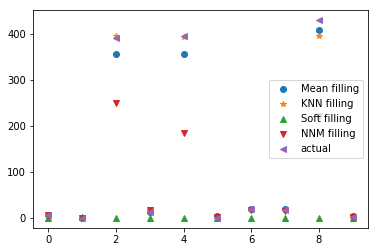

In [49]:
fig,ax = plt.subplots(1,1)
ax.plot(X_mean_filled[missing_mask],"o",label='Mean filling')
ax.plot(X_filled_knn[missing_mask],"*",label='KNN filling')
ax.plot(X_filled_softimpute[missing_mask],"^",label='Soft filling')
ax.plot(X_filled_nnm[missing_mask],"v",label='NNM filling')
ax.plot(boston.data[missing_mask],"<",label='actual')
ax.legend(loc='best')